- http://scikit-learn.org/stable/modules/ensemble.html#forest
- https://en.wikipedia.org/wiki/Random_forest
- Python Data Science Handbook, Jake VanderPlas

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called bagging. Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a random forest.  
This type of bagging classification can be done manually using Scikit-Learn's BaggingClassifier meta-estimator, as shown here:

tasks can be straightforwardly parallelized, because the individual trees are entirely independent entities.  
The multiple trees allow for a probabilistic classification: a majority vote among estimators gives an estimate of the probability (accessed in Scikit-Learn with the predict_proba() method).

Requires one-hot? Convertir las var categoricas en dummy variables. 

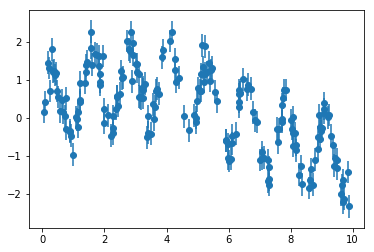

In [7]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

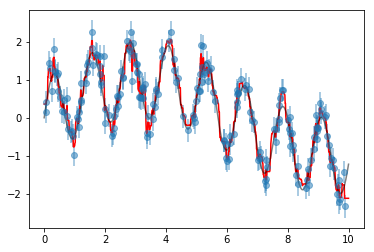

In [8]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

Detecta los diferentes periodos temporales. 

Cross-validation para classification problem: 

### Measuring predictions in binary classifications

Confusion matrix or contingency table , 2x2: TP; FP; TN; FN

Mas utilizadas: **Accuracy, error rate, F-score**.    

**Sensitivity: or recall or TPRate**  “Trend” from the sick patients to be positive -> P(+|E)   
**Specificity:**  “Trend” from the healthy individuals to be negative -> P(-|S)   Spec= TN / (TN + FP)  
**Positive predictive value VP+: or precision**  “Trust” in a positive result -> P(E|+)   
**Negative predictive value VP-:**  “Trust” in a negative result -> P(S|-)  ; NPV= TN / (TN + FN)


**Accuracy** = In other words, accuracy is the number of correct predictions (TP and TN) divided by the number of all samples (all entries of the confusion matrix summed up).   
**Precision or PPV** = TP / (TP + FP);  &nbsp;  Measures how many of the samples predicted as positive are actually positive.  
**Recall or sensitivity** = TP / (TP + FN); On the other hand, recall measures how many of the positive samples are captured by the positive predictions. Is used as performance metric when we need to identify all positive samples

There is a trade-off between optimizing recall and optimizing precision. 

One way to summarize them is the f-score or f-measure, which is with the harmonic mean of precision and recall:   
**fscore** = 2 \* precision \* recall / (precision + recall) 

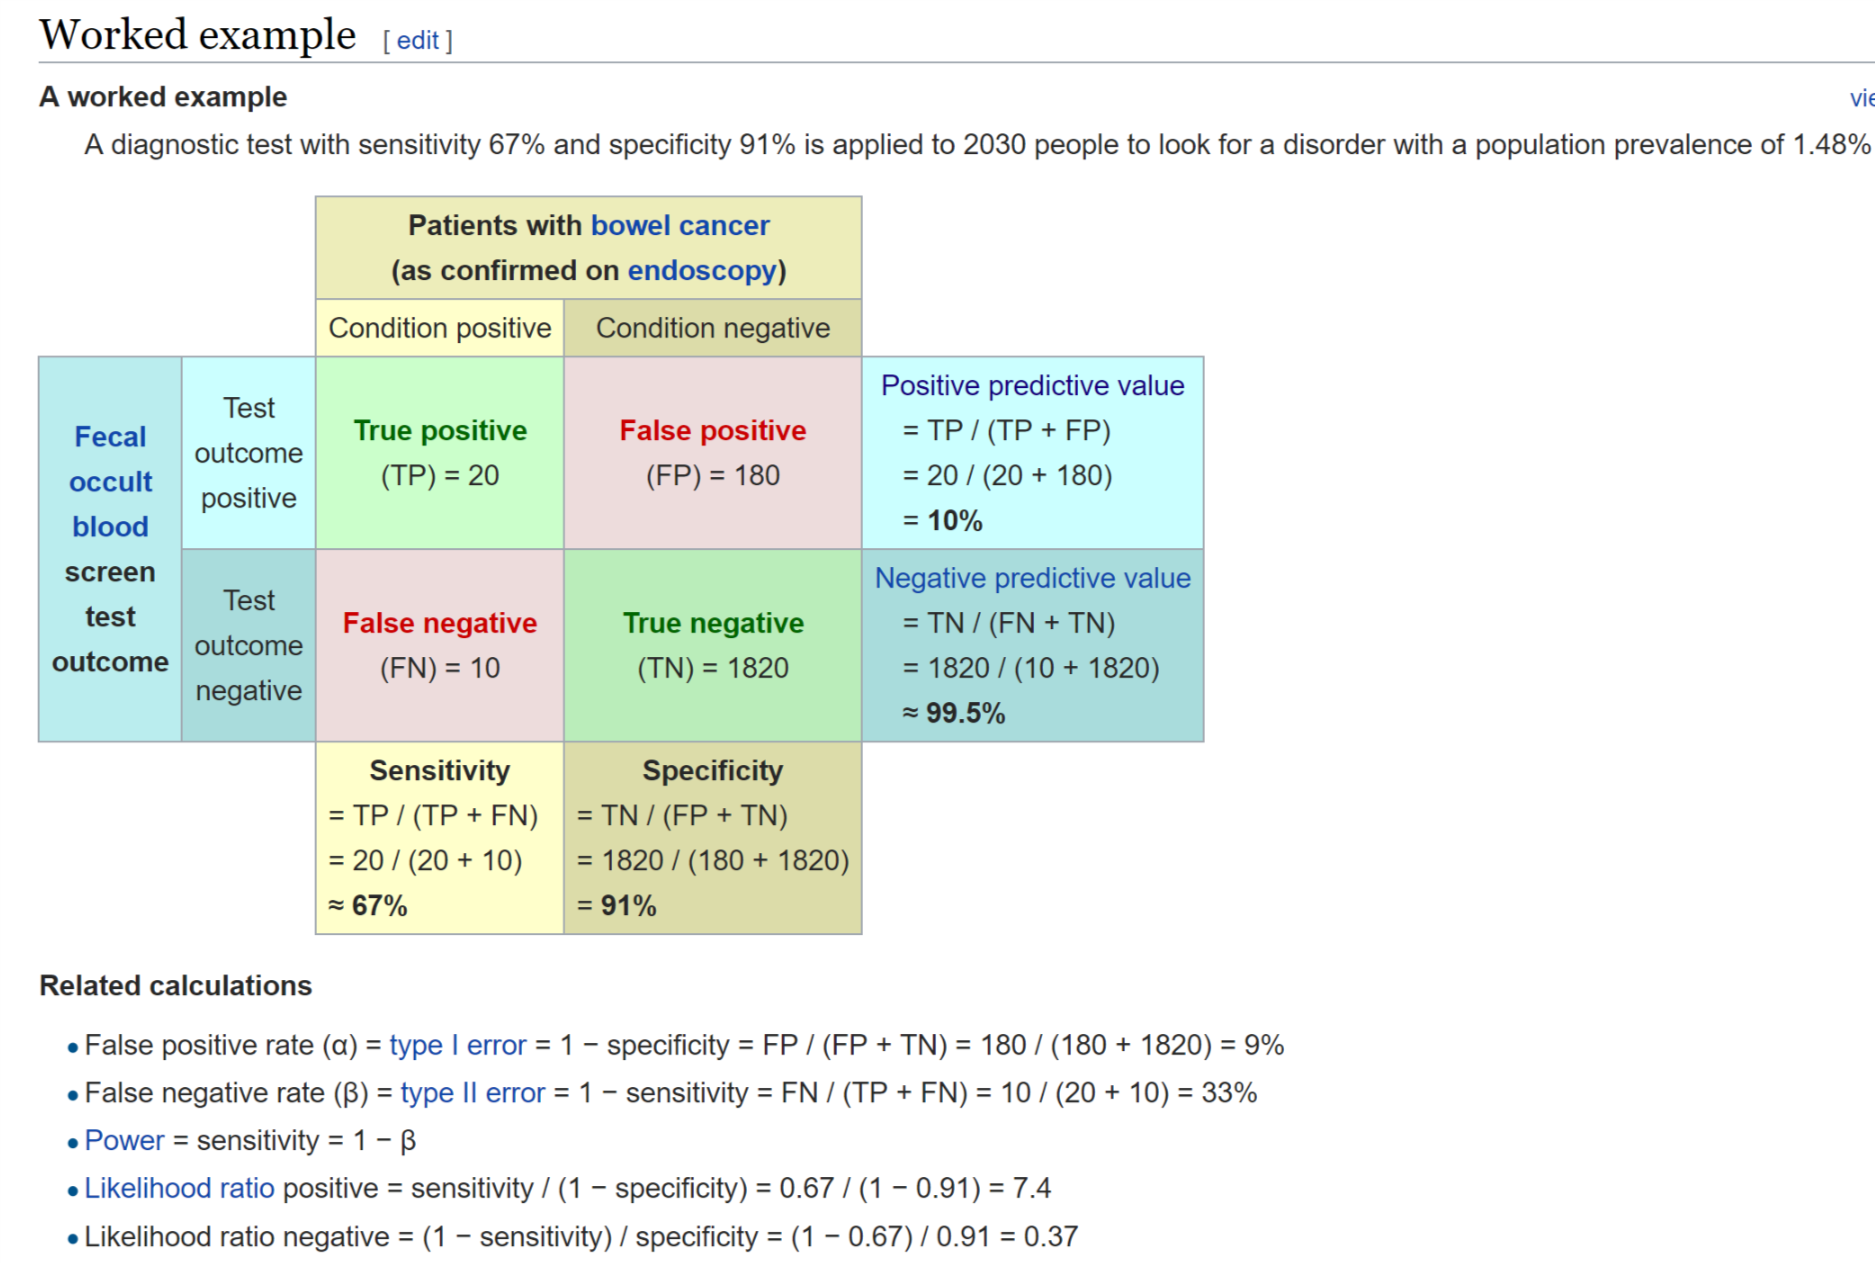

In [9]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo

i = Image(filename = 'C:/Users/agusa/Desktop/Min Dades/binary classification errors.png') 
display(i)


In [ ]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');